<a href="https://colab.research.google.com/github/ZarAhmed/MyMLWork/blob/zareefaltaf/Predictive_Analysis_in_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('/content/diabetes dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.shape

(768, 9)

Observation:
1. There are many rows with 0 value, which is abnormal atp. We need to perform Data Imputation
2. The last column is the Target column, which contains only 0 and 1. This is Supervised Learning problem and Logistic Regression can be performed.


We will now observe the stats

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


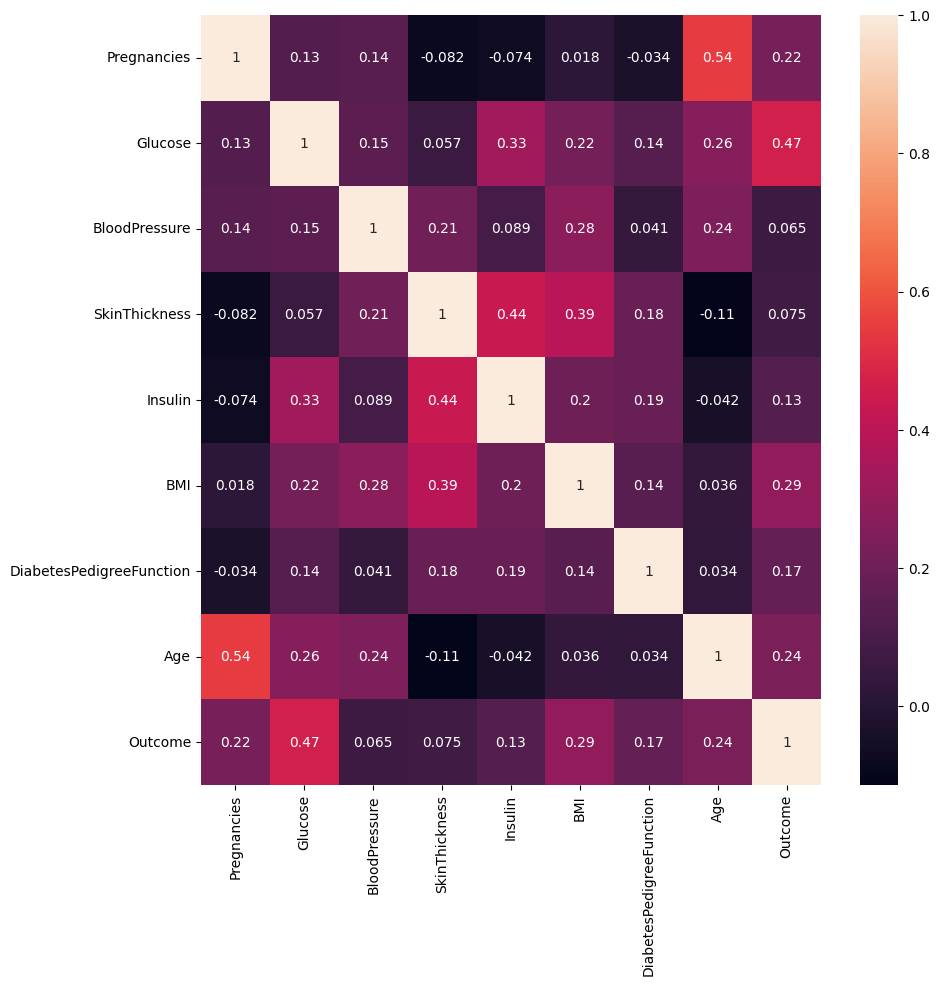

In [ ]:

plt.figure(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()


We can see that no columns are highly correlated with each other


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We will now observe the skewness of the data.
If the data is not skewed, we will impute the column with its mean or we will use median

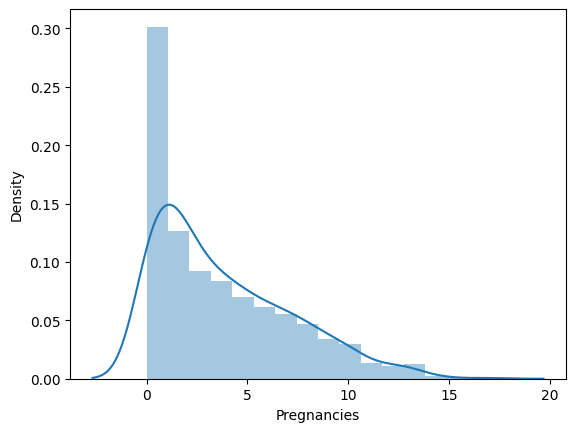

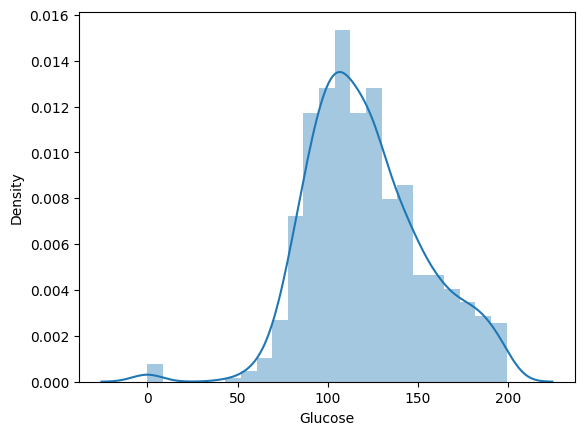

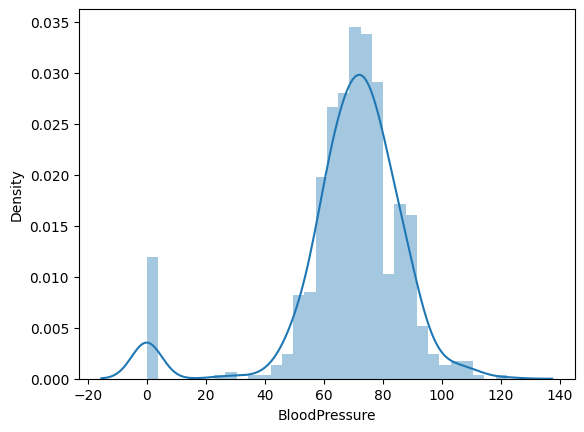

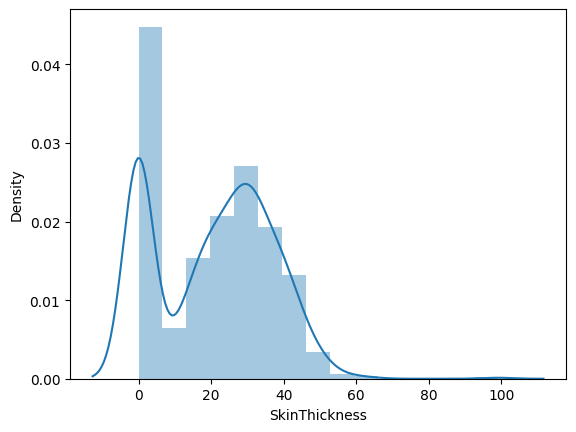

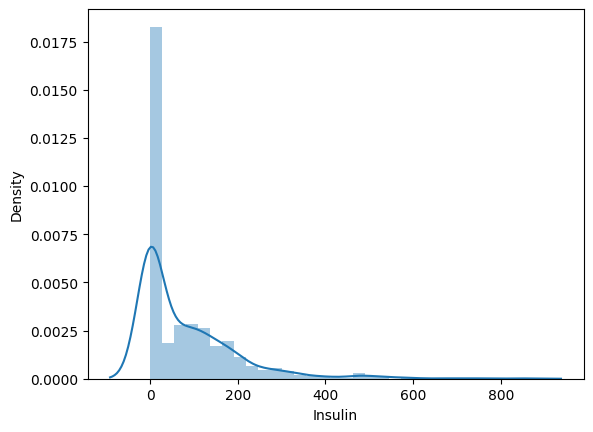

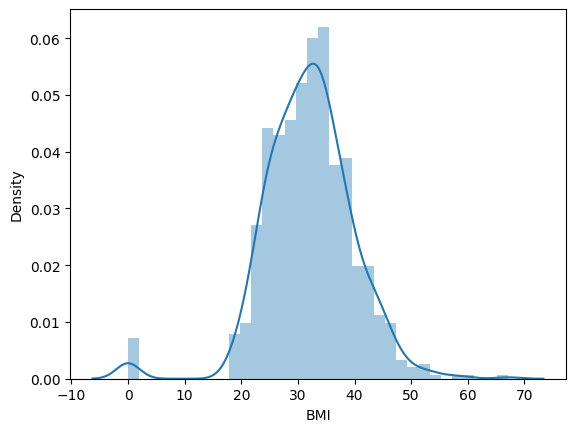

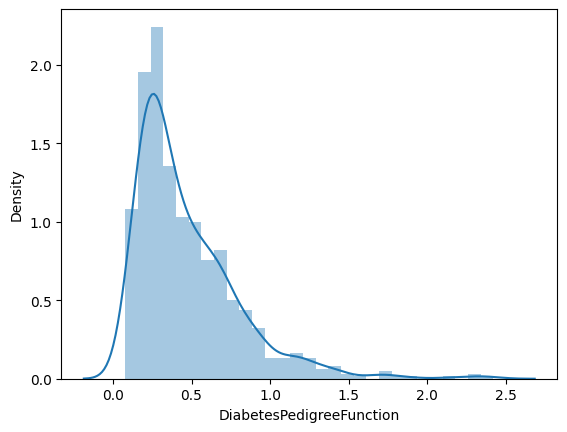

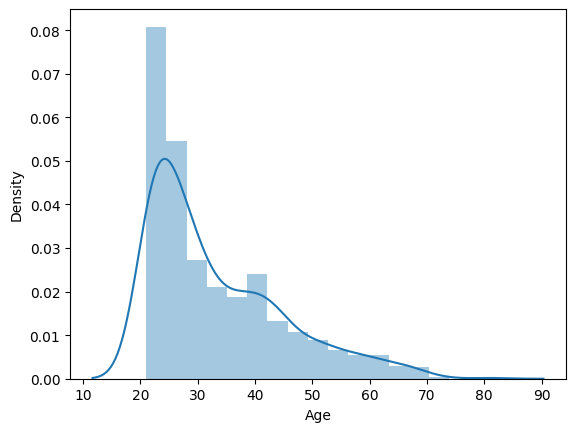

In [ ]:
col = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
def pr(col):
  for i in col:
    sns.distplot(df[i])
    plt.show()
pr(col)



We can observe that Pregnancies,Insulin,SkinThickness,DiabetesPedigreeFunction,Age are skewed due to 0 in the column, so we will replace 0 with their MEDIAN
Whereas for others we use MEAN

In [ ]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['Pregnancies'] = df['Pregnancies'].replace(0, df['Pregnancies'].median())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, df['DiabetesPedigreeFunction'].median())
df['Age'] = df['Age'].replace(0, df['Age'].median())


Splitting of data

In [ ]:
X = df.drop(columns='Outcome', axis=1)
y = df['Outcome']

Outlier detection

<Axes: >

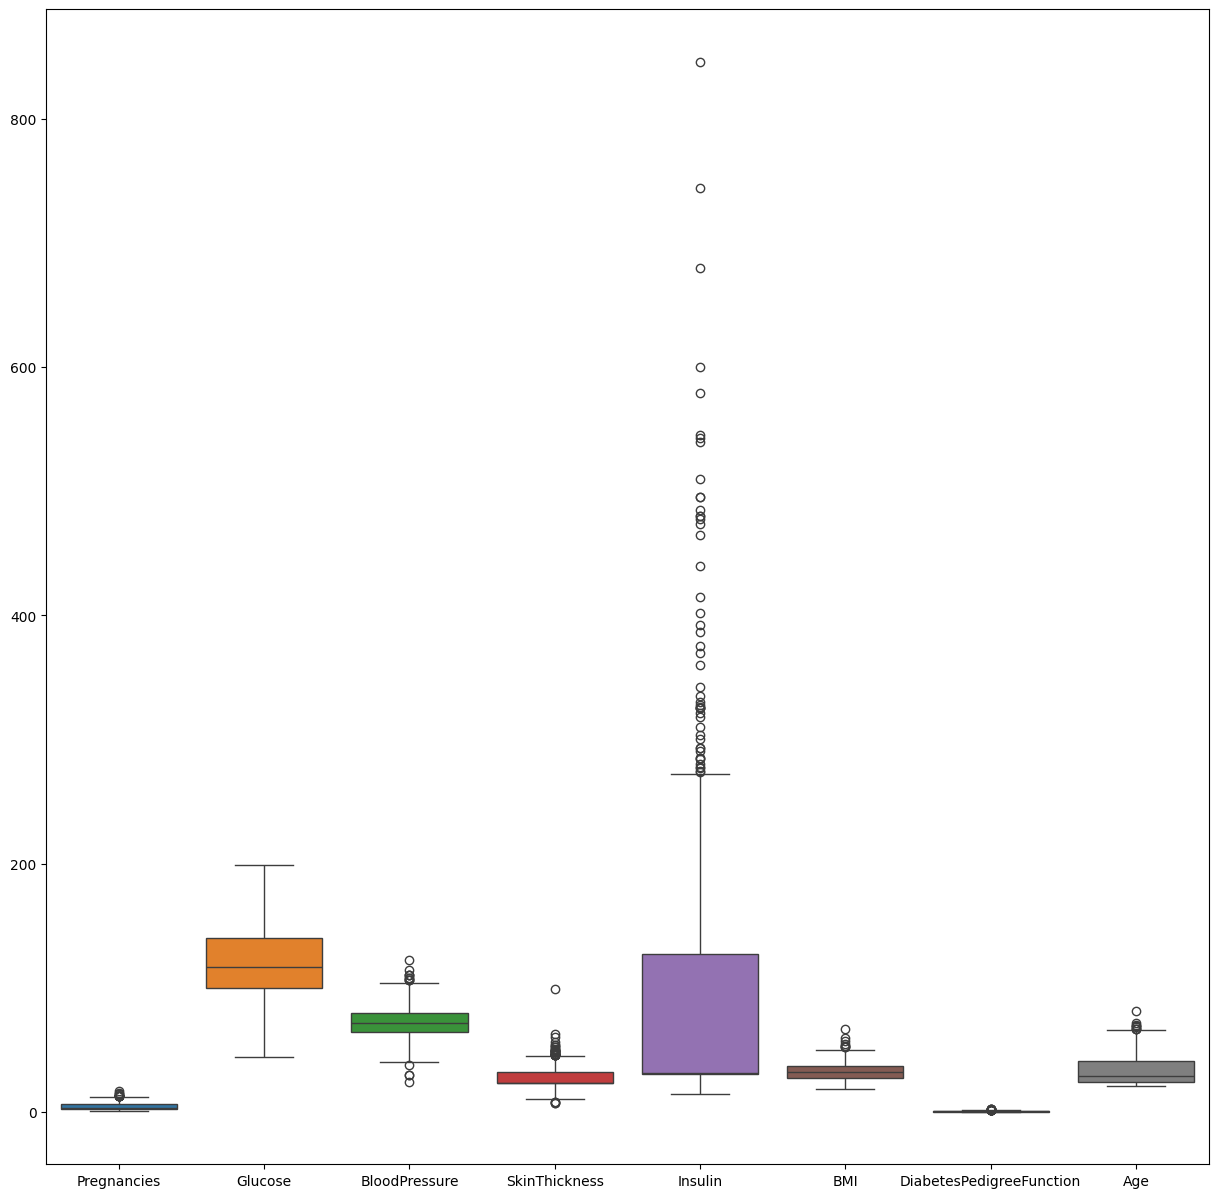

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X, ax=ax)
# plt.savefig('boxPlot.jpg')

In [ ]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)


In [ ]:
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]

We observe that the data are not normally distributed. Having a normally distributed data is important for regression algorithms. So we will use StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

In [ ]:
X_scaled.shape
X_scaled = pd.DataFrame(X_scaled, columns=X_outlier_detection.columns)


In [ ]:
X.shape
print('--------')
X_outlier_detection.shape

--------


(759, 8)

Step by step Guide for Quantile Approach for dealing with outliers

1. Resetting Indexes:
Purpose: Resetting the indexes ensures that both X_scaled and y_outlier_detection have continuous and consistent index values, starting from 0.

In [ ]:
X_scaled.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)


The reset_index() method with drop=True parameter removes the existing index and replaces it with a new one starting from 0. The inplace=True parameter modifies the DataFrame in place, without creating a new object.

Output: After resetting the indexes, both X_scaled and y_outlier_detection now have continuous index values, facilitating further analysis and visualization.

Quantile-based Filtering:
Purpose: Filtering the data based on a high quantile threshold (95th percentile) for the 'Insulin' feature aims to remove extreme values or potential outliers.

In [ ]:
q = X_scaled['Insulin'].quantile(.95)
mask = X_scaled['Insulin'] < q
dataNew = X_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

A threshold quantile (q) of 0.95 is computed for the 'Insulin' feature in the standardized dataset (X_scaled). Data points with 'Insulin' values below this threshold are retained (mask = X_scaled['Insulin'] < q), while those exceeding the threshold are filtered out.

3. Visualization with Box Plot:
Purpose: Visualizing the distribution of the filtered data using a box plot helps assess the impact of outlier removal and observe the updated distribution of the 'Insulin' feature.

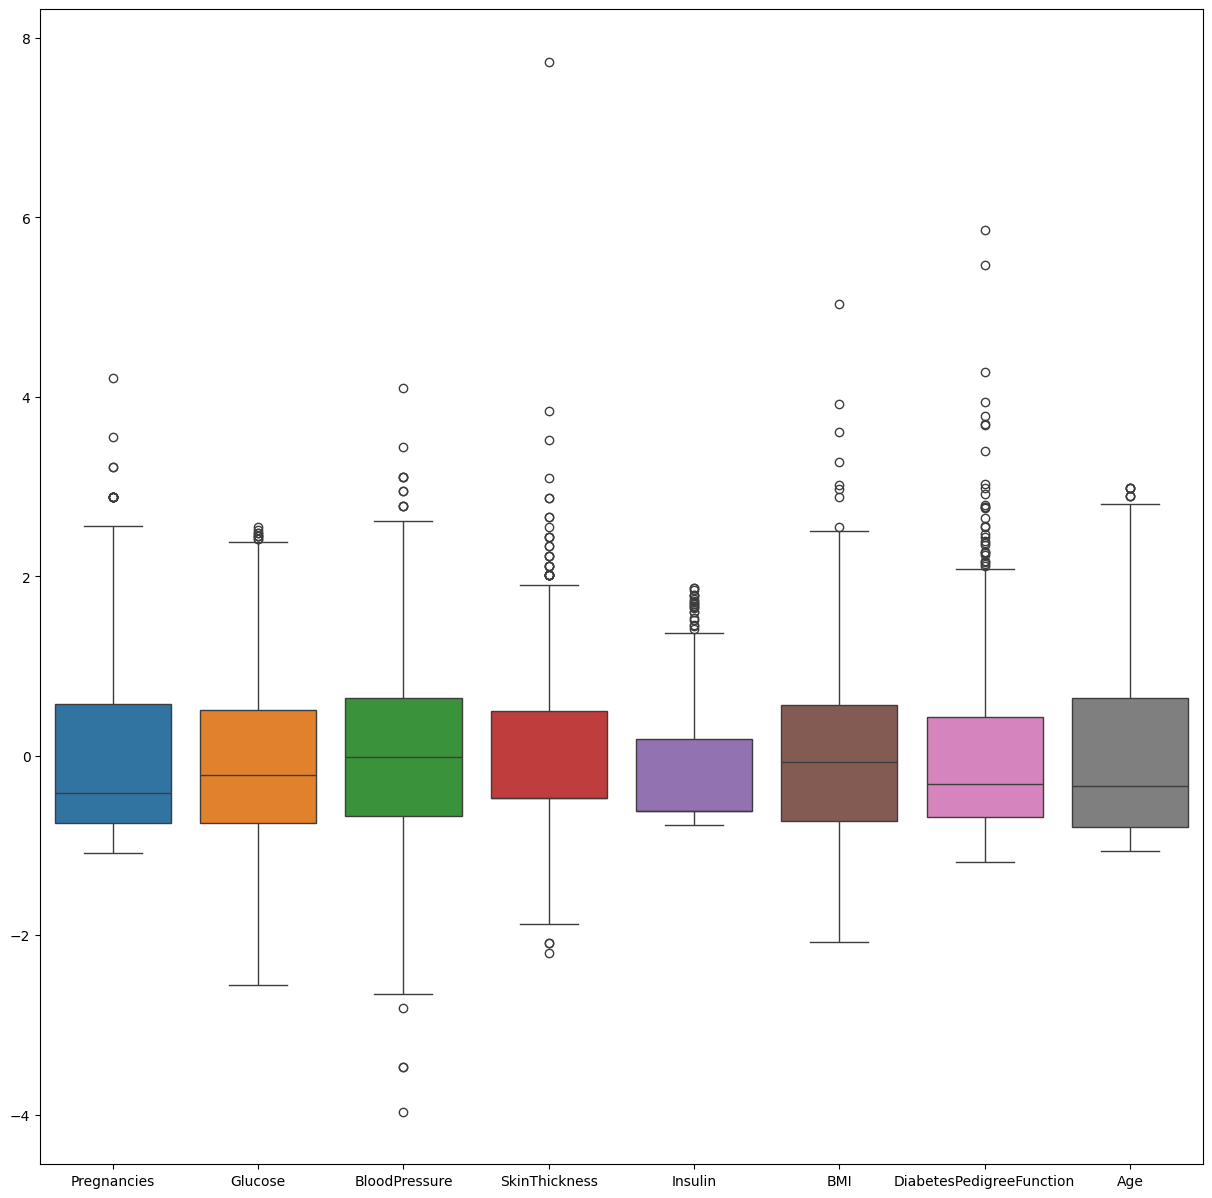

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('boxPlot.jpg')


A box plot is created for the filtered dataset (dataNew) to visualize the central tendency, spread, and potential outliers of the 'Insulin' feature after filtering.

Output: The box plot provides insights into the distribution of 'Insulin' values in the filtered dataset, highlighting any changes in the presence of outliers compared to the original distribution.



In [ ]:
y_outlier_detection.shape

(721,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataNew, y_outlier_detection, test_size=0.33, random_state=42)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())
print(X_train.shape)
print(X_test.shape)

Outcome
0    318
1    165
Name: count, dtype: int64
Outcome
0    159
1     79
Name: count, dtype: int64
(483, 8)
(238, 8)


Here we observe that the value counts of the target column are imbalanced i.e the count of 0 is twice that of 1. This leads to the model to be biased. Hence to handle the imbalanced data, we perform either:

Oversampling : Minority Class and increase that number to the majority class

Undersampling : Majority class and decrease that number to the minority class

SMOTE : Synthetic data and increase the number of samples to the majority class

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())



Resampled class distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


Model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7478991596638656


In [ ]:
target_names = ['Non-diabetic', 'Diabetic']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non-diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



Model using Naive Bayes Classification


In [ ]:
from sklearn.naive_bayes import GaussianNB

model_gaussian_naive_bayes = GaussianNB()
model_gaussian_naive_bayes.fit(X_train_resampled,y_train_resampled)

GaussianNB()

In [ ]:
y_pred_gaussian = model_gaussian_naive_bayes.predict(X_test)
print(y_pred_gaussian)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0]


In [ ]:
print(accuracy_score(y_test, y_pred_gaussian))

0.7184873949579832


Here the accuracy score of Naive Bayes Classifier is less than Logistic Regression

In [ ]:
confusion_matrix(y_test, y_pred_gaussian)

array([[119,  40],
       [ 27,  52]])

In [ ]:
print(classification_report(y_test, y_pred_gaussian, target_names=target_names))

              precision    recall  f1-score   support

Non-diabetic       0.82      0.75      0.78       159
    Diabetic       0.57      0.66      0.61        79

    accuracy                           0.72       238
   macro avg       0.69      0.70      0.69       238
weighted avg       0.73      0.72      0.72       238

